# A general curve fitting programme

### Setup instructions
This programme allows you to import data from columns of a csv file and then fit a line to the experimental data points. It requires you to know the form of the equation and by default is set up to be a gaussian (normal) function. You adjust the inputs for the data in the first cell below and define the equation in the second cell below. It requires the following packages to be installed:
- Pandas
- Numpy
- Matplotlib
- ipympl

It also is designed to run in Jupyter notebook specifically. The magic "%matplotlib notebook" cell will not work in Jupyter labs. If the data imported has errors they can be propagated through to give errors on the coefficients of the fit using the monte carlo method in the final cell.
### Instructions on use
After adjusting the first 2 cells to suit your data you can simply run each cell in order. The curve fit requires approximate values for each coefficient in the fit which you provide using float text widgets. With those widgets will be a graph which displays the experimental data and the line with your current guesses. Adjust the values until you are happy it is an approximately correct guess and then click on the "Stop Interaction" (power symbol) button in the top right of the graph before running the next cell. The next cell performs the curve fit, plots the fitted line with the experimental data and prints out the values for each coefficient. The final cell gives the errors.
### Final notes
Included with this programme you will find 3 csv files:
- noisy_gaussian_with_errors.csv
- noisy_gaussian.csv
- noisy_linear_with_errors.csv

The programme is set up to use the "noisy_gaussian_with_errors.csv" file by default. These 3 files can be used to test that you understand how to use the code.

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets
from IPython.display import display

"""
This cell contains most of the user inputs necessary for the curve fitting.

filename is the location of the csv you wish to import data from to fit a line to.
num_of_const is the number of coefficients you wish to fit in the equation of the line.
x_axis_name and y_axis_name are the names of the axes in the final plot with a fitted line.
has_x_errors and has_y_errors are booleans stating whether there are symmetric errors on the x and y axis data points.
x/y_data_column and x/y_error_column are set to the index of the column of data in the csv using 0 based indexing (the first column is index 0).
monte_carlo_repeats is the number of times the data is randomised and fit to within the monte carlo method of propagating errors (see final box for more details).
"""

filename = "noisy_gaussian_with_errors.csv"
num_of_const = 4
x_axis_name = "X axis"
y_axis_name = "Y axis"

# Set to True or False depending on if there are errors for that data in the csv file.
has_x_errors = True
has_y_errors = True

# Symmetric errors are assumed. If there are no columns with errors set them to any value.
x_data_column = 0
x_error_column = 1
y_data_column = 2
y_error_column = 3

monte_carlo_repeats = 10000

In [9]:
"""
This is the function describing the line you want to fit to.
By default set up for a straight line fit.
- consts is a list of the constants to be fitted in the function.
- x is the input x axis points.

If the input of args is a single list then the tuple args will be unpacked.
"""

def fit_function(x, *args):
    
    # Allows either a single list containing all of the coefficients to be passed in or the coefficients to be passed in as
    # individual arguments by unpacking the list from the tuple if a list is passed in.
    if type(args[0]) == list:
        args = args[0]
    
    # Define coefficients here from args to be used in the equation.
    A = args[0]
    B = args[1]
    C = args[2]
    D = args[3]
    
    # The following equation contains the form of the line you wish to fit to your data.
    # It is assumed that you pass in the data corresponding to the x axis as defined in the previous cell to return the y axis.
    """Change this equation and the coefficient definitions above to change the form of the equation."""
    y = A*np.exp(-B*(x-C)**2) + D
    
    return y

The following cell changes the backend to an interactive backend to allow for changing plots. It requires the "ipympl" package.

In [10]:
%matplotlib notebook

In [11]:
"""
This cell imports the data.
"""

# The data is imported from the csv file using pandas as numpy arrays.
df1 = pd.read_csv(filename)
x_data = df1[df1.columns[x_data_column]].values
y_data = df1[df1.columns[y_data_column]].values

# The errors are also imported if present and otherwise set to a None type to be passed into the matplotlib errorbar 
# function later.
if has_x_errors:
    x_data_err = df1[df1.columns[x_error_column]].values
else:
    x_data_err = None
if has_y_errors:
    y_data_err = df1[df1.columns[y_error_column]].values
else:
    y_data_err = None

# The x data for the line we're presenting to the user at the end with fitted data will go 10% further than the experimental
# data on both ends.
start = x_data.min() - 0.1*(x_data.max()-x_data.min())
end = x_data.max() + 0.1*(x_data.max()-x_data.min())

x_fitted = np.arange(start, end, (end-start)/300)

FloatText(value=1.0, description='Coefficient 1:')

Output()

FloatText(value=1.0, description='Coefficient 2:')

Output()

FloatText(value=1.0, description='Coefficient 3:')

Output()

FloatText(value=1.0, description='Coefficient 4:')

Output()

Adjust the values for coefficients with the above widgets. 
Once you're happy click the 'Stop Interaction' button to the top right of the graph.


<IPython.core.display.Javascript object>


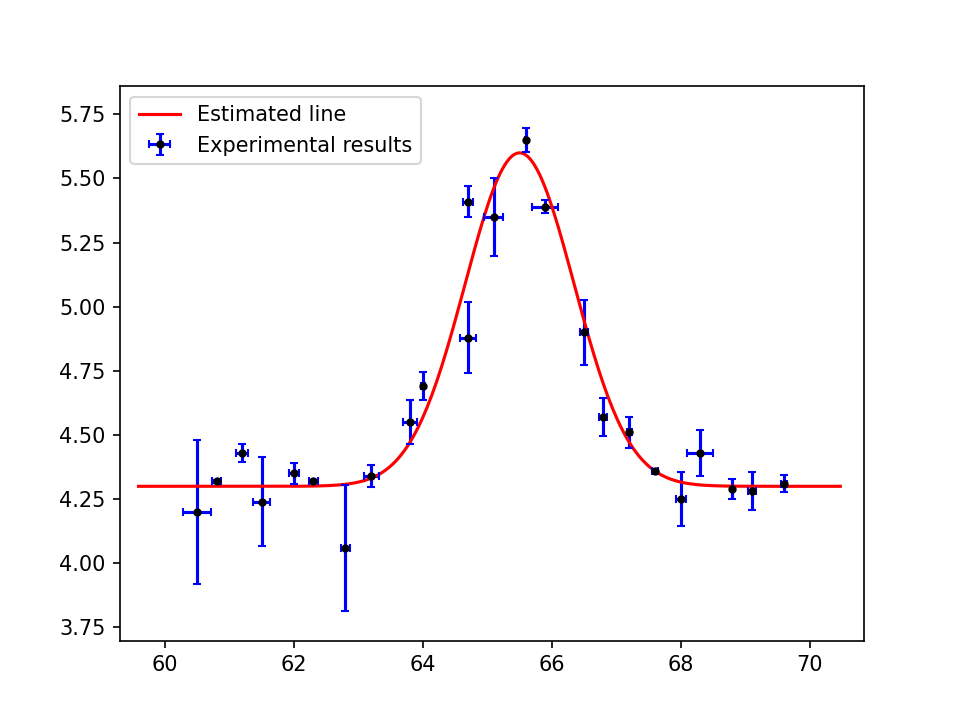

In [12]:
"""
This cell obtains the guesses from the user for the line fit.
"""

# Set up a function to run every time one of the widgets containing the user's inputs is changed, to refresh the graph.
def on_value_change(change):
    with output2:
        # Obtain the new coefficients, generate new y axis data, then refresh the graph.
        coeffs = [i.value for i in widget_list]
        guess_y_data = fit_function(x_fitted, coeffs)
        line1.set_ydata(guess_y_data)
        figure.canvas.draw()
        figure.canvas.flush_events()

# Create a list of widgets. One for each coefficient of the formula. Default value of 1 to avoid common divide by 0 errors.
widget_list = [widgets.FloatText(description=f"Coefficient {i+1}:", value=1) for i in range(num_of_const)]
output2 = widgets.Output()
    
# Display each of the widgets and link the on_value_change function to them.
for indiv_widget in widget_list:
    display(indiv_widget, output2)
    indiv_widget.observe(on_value_change, names='value')

# Generate the coefficients and y data for the first time.
coeffs = [i.value for i in widget_list]
guess_y_data = fit_function(x_fitted, coeffs)

# Inform the user on how to use this box.
print("Adjust the values for coefficients with the above widgets. \nOnce you're happy click the 'Stop Interaction' button to the top right of the graph.")

# Create an interactive plot.
plt.ion()
figure, ax = plt.subplots()

# Plot the two lines on the graph.
line1, = ax.plot(x_fitted, 
                 guess_y_data, 
                 color ="red", 
                 label ="Estimated line")

line2 = ax.errorbar(x_data, 
                     y_data, 
                     xerr =x_data_err, 
                     yerr =y_data_err, 
                     fmt =".k", 
                     ecolor ="b", 
                     capsize =2, 
                     label ="Experimental results")

plt.legend(loc="upper left")

# Display the plot for the first time.
figure.canvas.draw()
figure.canvas.flush_events()

<IPython.core.display.Javascript object>


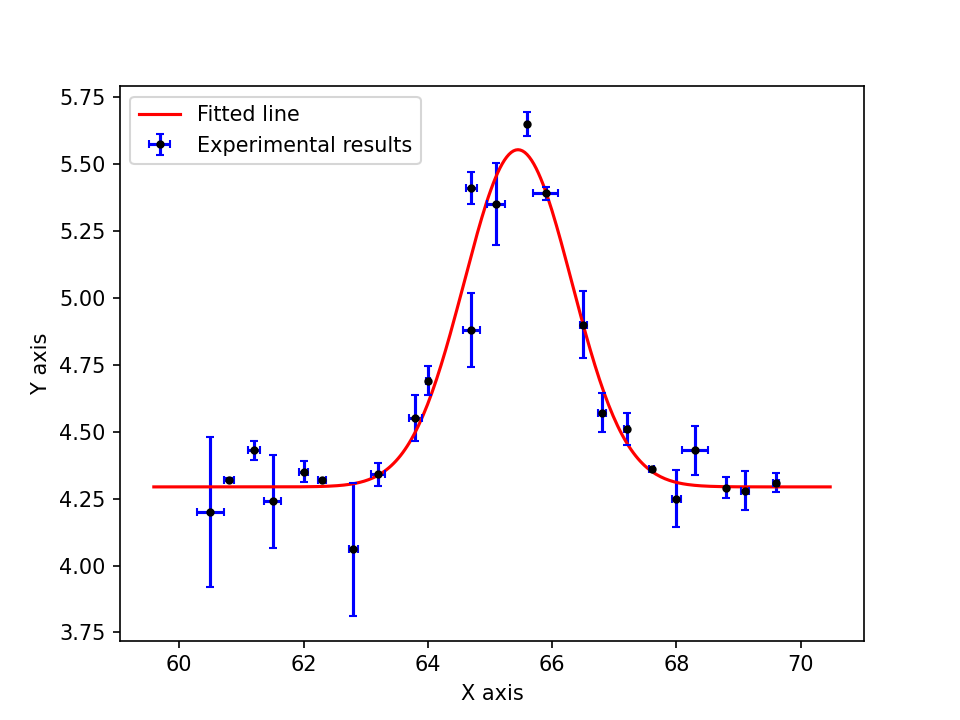

Fitted coefficients:
[1.259072692438732, 0.6649936141906423, 65.44981214980922, 4.29359870395896]


In [13]:
"""
This cell:
- performs the fit, 
- graphs it against the experimental data, 
- gives an output of the constants.
"""

# Extracts the guessed values for the coefficients from the current values set in the widgets in the previous cell.
coeffs = [i.value for i in widget_list]

# Uses scipy to fit a curve to the experimental data given these guessed coefficent values and the equation of the line.
parameters, covariance = curve_fit(fit_function, x_data, y_data, p0=coeffs)

# Extracts the fitted coefficients from parameters
const_fitted = [parameters[i] for i in range(num_of_const)]

# Generates some data for the y axis given the new fitted coefficients.
y_fitted = fit_function(x_fitted, const_fitted)

# Plots the fit for comparison to the experimental data.
plt.plot(x_fitted, 
         y_fitted, 
         "red", 
         label ="Fitted line")

# Plots the experimental data for comparison to the fit.
plt.errorbar(x_data, 
             y_data, 
             xerr =x_data_err, 
             yerr =y_data_err, 
             fmt =".k", 
             ecolor ="b", 
             capsize =2, 
             label ="Experimental results")

# Plot formatting.
plt.xlabel(x_axis_name)
plt.ylabel(y_axis_name)
plt.legend(loc="upper left")
plt.show()

# Prints the coefficients.
print(f"Fitted coefficients:\n{const_fitted}")

In [14]:
"""
This cell calculates errors on the coefficients using Monte-Carlo error propagation.
It repeatedly varies the position of the points within their errors, performing a fit for coefficients each time, then takes
the standard deviation of the resulting set of fitted coefficients.
"""

# Only bothers to calculate the errors if there are any.
if has_x_errors or has_y_errors:
    
    # Creates a list containing empty sublists. Each sublist will contain many values for the same coefficient.
    varying_const_list = [[] for _ in range(num_of_const)]
    
    # Repeats as many times as specified.
    for _ in range(monte_carlo_repeats):
        
        # Generates x and y data to fit a curve to by varying the position of each point by random values in x and y
        # given by a normal distribution with standard deviation given by the errors.
        if has_x_errors:
            test_x_data = x_data + np.random.normal(scale=x_data_err)
        else:
            test_x_data = x_data

        if has_y_errors:
            test_y_data = y_data + np.random.normal(scale=y_data_err)
        else:
            test_y_data = y_data
        
        # Fits a curve to these randomly varied points.
        parameters, covariance = curve_fit(fit_function, test_x_data, test_y_data, p0=const_fitted)
        
        # Adds the values of the coefficients to the varying_const_list sublists.
        for i in range(num_of_const):
            varying_const_list[i].append(parameters[i])
    
    # Creates a list to store the values of the errors on each coefficient.
    const_err = []
    # For each coefficient it calculates the error, adds it to the list, then prints the value of the coefficient along with
    # it's error.
    for i in range(num_of_const):
        const_err.append(np.std(varying_const_list[i]))
        print(f"Coefficient {i+1}: {const_fitted[i]} ± {const_err[i]}")

Coefficient 1: 1.259072692438732 ± 0.07935616892884494
Coefficient 2: 0.6649936141906423 ± 0.09640092031196336
Coefficient 3: 65.44981214980922 ± 0.05985351169107203
Coefficient 4: 4.29359870395896 ± 0.0351362180756297
